In [66]:
# load the autoreload extension
%reload_ext autoreload
# Set extension to reload modules every time before executing code
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
%matplotlib inline

In [67]:
# Import random forest regressor and multioutput regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,mean_squared_error
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [68]:
full_data = np.load('machine_learning_data.npy')
np.random.shuffle(full_data)

In [249]:
X_data = pd.DataFrame(full_data[:,:-5])
y_data = pd.DataFrame(full_data[:,-5:])


In [250]:
def plot_corr(pred,test):
    sns.jointplot(pred.iloc[:,0],test.iloc[:,0],kind = "kde")
    sns.jointplot(pred.iloc[:,1],test.iloc[:,1],kind = 'kde',color='purple')
    sns.jointplot(pred.iloc[:,2],test.iloc[:,2],kind = 'kde',color='blue')
    sns.jointplot(pred.iloc[:,3],test.iloc[:,3],kind = 'kde',color='green')
    sns.jointplot(pred.iloc[:,4],test.iloc[:,4],kind = 'kde',color='red')
    plt.tight_layout
    
def plot_error(pred,test,dims=(12,8)):
    fig,ax = plt.subplots(figsize=dims)
    sns.distplot(pred.iloc[:,0]-test.iloc[:,0],color='blue',ax=ax,kde_kws={"label": "M_cut"})
    sns.distplot(pred.iloc[:,1]-test.iloc[:,1],color='cyan',ax=ax,kde_kws={"label": "M_1"})
    sns.distplot(pred.iloc[:,2]-test.iloc[:,2],color='purple',ax=ax,kde_kws={"label": "Sigma"})
    sns.distplot(pred.iloc[:,3]-test.iloc[:,3],color='yellow',ax=ax,kde_kws={"label": "Kappa"})
    sns.distplot(pred.iloc[:,4]-test.iloc[:,4],color='red',ax=ax,kde_kws={"label": "Alpha"})

In [251]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.1,random_state=42)

In [261]:
#fit Random Forest Regressor

reg_rf = RandomForestRegressor(
    n_estimators=3000,
    criterion='mse',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=False,
    oob_score=False,
    n_jobs=-1,
    random_state=0,
    verbose=0,
    warm_start=False,
)

reg_rf.fit(X_train.iloc[:,[18,29,40,42]],y_train)
y_rf = reg_rf.predict(X_test.iloc[:,[18,29,40,42]])


In [262]:
reg_rf.score(X_test.iloc[:,[18,29,40,42]],y_test)

/home/ajana/anaconda3/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


-0.19686969937782453

In [263]:
print (np.mean((y_rf - y_test)/(y_test)*100, axis=0))

0    0.002872
1    0.006610
2    0.503589
3    2.413321
4    0.610788
dtype: float64


In [264]:
y_rf = pd.DataFrame(y_rf)

y_test.reset_index(drop=True, inplace=True)
y_rf.reset_index(drop=True, inplace=True)


In [265]:
pd.concat([y_test,y_rf] ,axis = 1)

,0,1,2,3,4,0,1,2,3,4
0,13.128865,13.975699,1.211410,0.998394,0.833993,13.086570,14.013005,1.140847,1.178264,0.769911
1,13.207085,14.072808,1.185864,0.976456,0.964105,13.195564,14.104250,1.168123,1.052597,0.839080
2,13.022482,14.044332,0.799930,0.872392,0.967658,13.029338,14.119231,0.810180,0.813917,0.899242
3,13.193357,14.128555,0.757379,1.066355,0.910765,13.278535,14.054196,0.926937,1.183729,0.863540
4,13.189583,14.124943,1.046441,1.118951,0.844503,13.143599,14.095283,0.949703,1.407438,0.778579
...,...,...,...,...,...,...,...,...,...,...
995,13.143019,13.964824,1.136844,1.009518,1.054854,13.169629,14.093010,1.188246,1.353666,1.045291
996,13.241714,13.986675,0.994604,1.248518,0.738370,13.183577,14.081607,0.892682,0.801697,0.812146
997,13.064611,14.017859,0.943601,1.162801,0.778131,13.015986,14.117009,0.857095,1.488185,0.806223
998,13.042294,14.023909,1.031548,0.769564,0.757461,13.014593,14.027963,0.968764,1.216291,0.771335


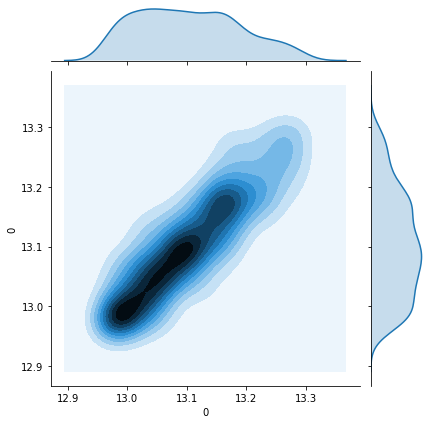

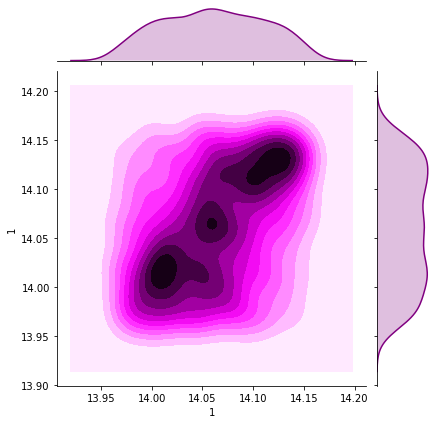

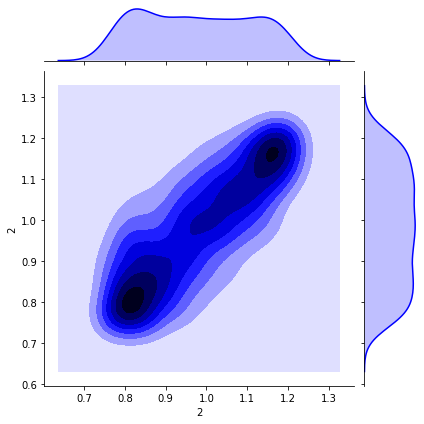

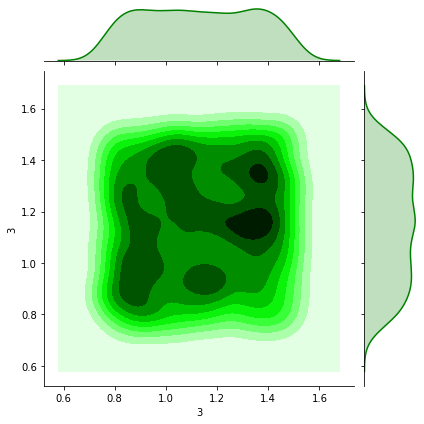

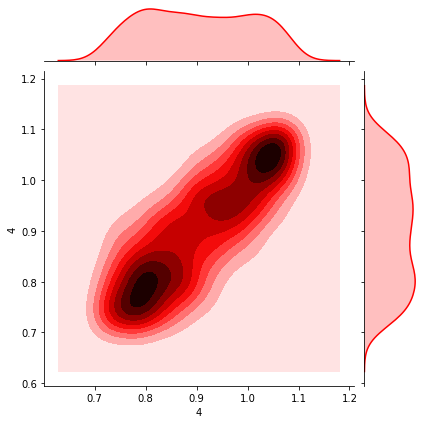

In [266]:
plot_corr(y_rf,y_test)

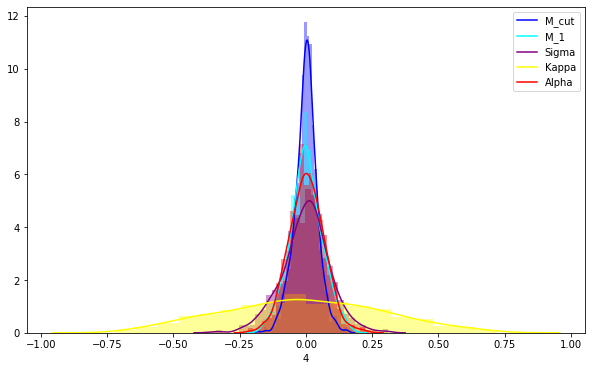

In [267]:
plot_error(y_rf,y_test,dims=(10,6))

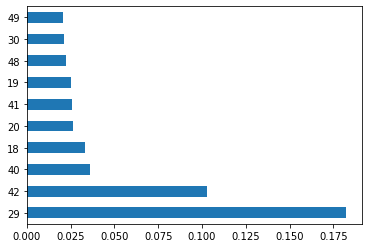

In [259]:
feat_importances = pd.Series(reg_rf.feature_importances_, index=X_data.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [260]:
feat_importances,feat_importances.nlargest(4)

(0     0.001853
 1     0.002471
 2     0.003531
 3     0.003805
 4     0.006539
 5     0.007212
 6     0.008953
 7     0.008138
 8     0.010460
 9     0.012207
 10    0.016594
 11    0.013242
 12    0.014861
 13    0.012633
 14    0.010746
 15    0.017724
 16    0.016724
 17    0.020618
 18    0.033323
 19    0.024956
 20    0.026459
 21    0.016595
 22    0.017442
 23    0.012008
 24    0.008700
 25    0.007743
 26    0.009788
 27    0.011276
 28    0.015850
 29    0.182149
 30    0.021222
 31    0.018329
 32    0.014606
 33    0.012015
 34    0.013410
 35    0.012037
 36    0.018075
 37    0.014333
 38    0.020417
 39    0.017776
 40    0.035992
 41    0.025807
 42    0.102632
 43    0.018901
 44    0.011851
 45    0.014617
 46    0.012856
 47    0.017629
 48    0.022241
 49    0.020653
 dtype: float64, 29    0.182149
 42    0.102632
 40    0.035992
 18    0.033323
 dtype: float64)

(array([ 19.,  64., 121., 143., 170., 140., 152., 116.,  53.,  22.]),
 array([13.97435501, 13.99253232, 14.01070963, 14.02888695, 14.04706426,
        14.06524157, 14.08341888, 14.1015962 , 14.11977351, 14.13795082,
        14.15612814]),
 <a list of 10 Patch objects>)

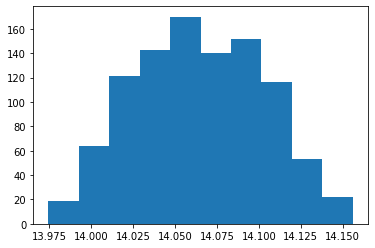

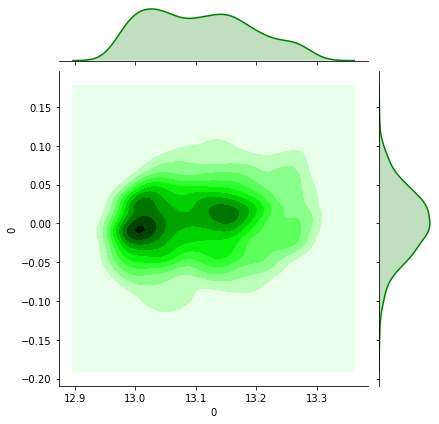

In [24]:
sns.jointplot(y_rf.iloc[:,0],y_rf.iloc[:,0]-y_test.iloc[:,0],kind = 'kde',color='green')

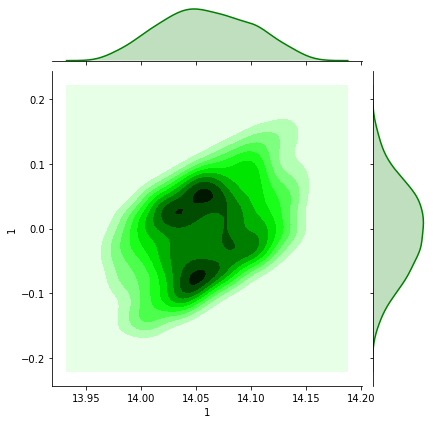

In [25]:
sns.jointplot(y_rf.iloc[:,1],y_rf.iloc[:,1]-y_test.iloc[:,1],kind = 'kde',color='green')

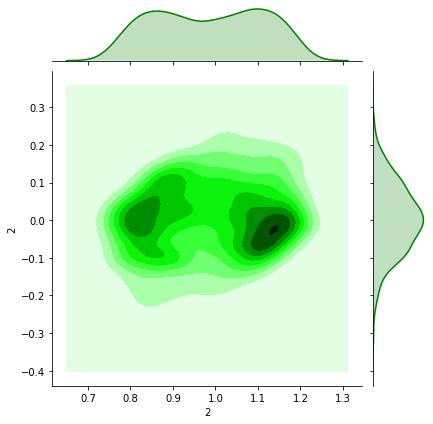

In [26]:
sns.jointplot(y_rf.iloc[:,2],y_rf.iloc[:,2]-y_test.iloc[:,2],kind = 'kde',color='green')

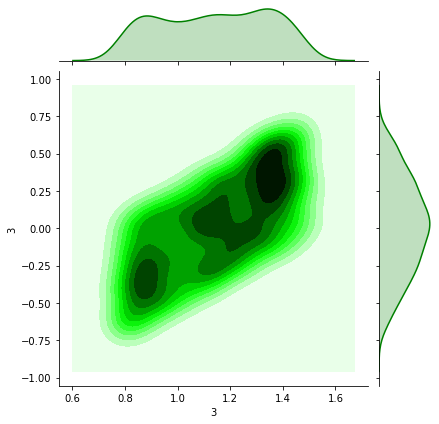

In [27]:
sns.jointplot(y_rf.iloc[:,3],y_rf.iloc[:,3]-y_test.iloc[:,3],kind = 'kde',color='green')

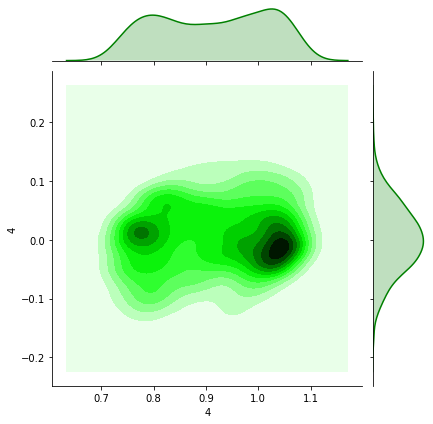

In [28]:
sns.jointplot(y_rf.iloc[:,4],y_rf.iloc[:,4]-y_test.iloc[:,4],kind = 'kde',color='green')

In [268]:
from xgboost import XGBRegressor

#fit multioutput regressor
multioutputregressor = MultiOutputRegressor(XGBRegressor(max_depth=1000,n_estimators=10000, 
                                                         learning_rate=0.05,
                                                         objective = 'reg:squarederror',
                                                         booster='gbtree',
                                                         n_jobs=-1))
multioutputregressor.fit(X_train.iloc[:,[18,29,40,42]], y_train)
# predicting
y_multirf = multioutputregressor.predict(X_test.iloc[:,[18,29,40,42]])


In [269]:
print (np.mean((y_multirf - y_test)*100/(y_test), axis=0))
multioutputregressor.score(X_test.iloc[:,[18,29,40,42]],y_test)

0   -0.001046
1    0.001720
2    0.370483
3    2.084827
4    0.540439
dtype: float64


0.49229328236575254

In [270]:
y_multirf = pd.DataFrame(y_multirf)
y_multirf.reset_index(drop=True, inplace=True)

In [271]:
pd.concat([y_test,y_multirf], axis = 1)

,0,1,2,3,4,0,1,2,3,4
0,13.128865,13.975699,1.211410,0.998394,0.833993,13.088226,14.019139,1.152075,1.193279,0.880814
1,13.207085,14.072808,1.185864,0.976456,0.964105,13.161712,14.093706,1.130188,0.994991,0.930703
2,13.022482,14.044332,0.799930,0.872392,0.967658,13.024231,14.006670,0.832134,0.995999,0.908481
3,13.193357,14.128555,0.757379,1.066355,0.910765,13.261800,14.069427,0.897403,1.135382,0.850733
4,13.189583,14.124943,1.046441,1.118951,0.844503,13.178485,14.094623,1.027575,1.159923,0.787485
...,...,...,...,...,...,...,...,...,...,...
995,13.143019,13.964824,1.136844,1.009518,1.054854,13.162980,14.019281,1.182740,0.971486,1.063868
996,13.241714,13.986675,0.994604,1.248518,0.738370,13.196232,14.054361,0.927753,0.973435,0.808368
997,13.064611,14.017859,0.943601,1.162801,0.778131,13.029368,14.044156,0.865051,1.088841,0.757389
998,13.042294,14.023909,1.031548,0.769564,0.757461,13.038971,14.030580,1.019428,1.095151,0.768896


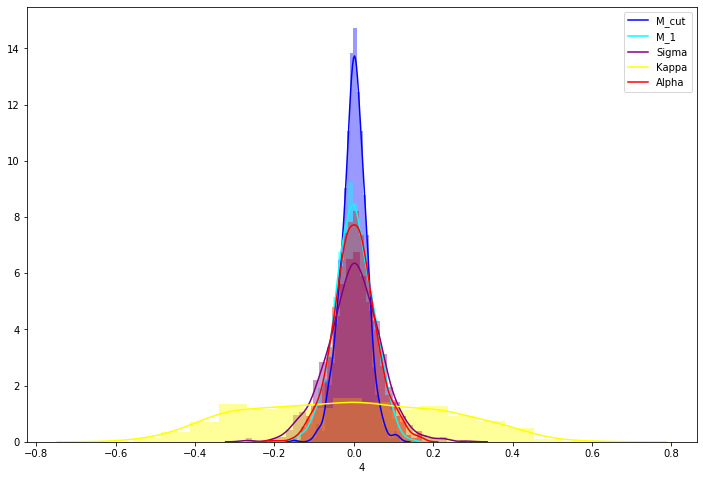

In [272]:
plot_error(y_multirf,y_test)

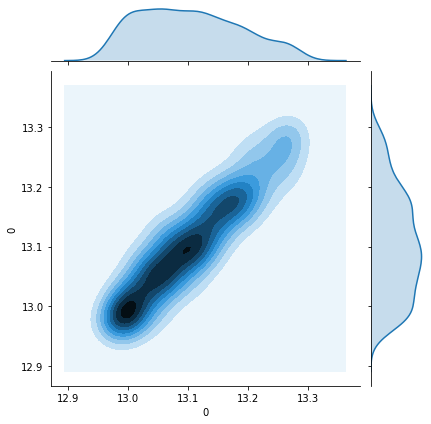

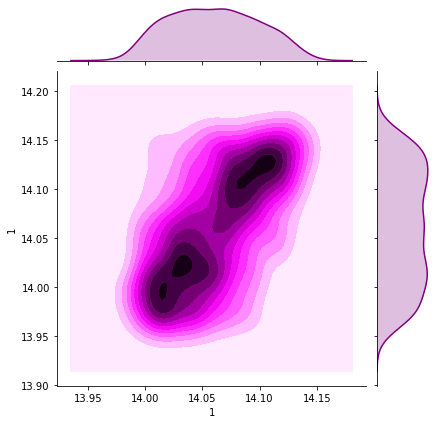

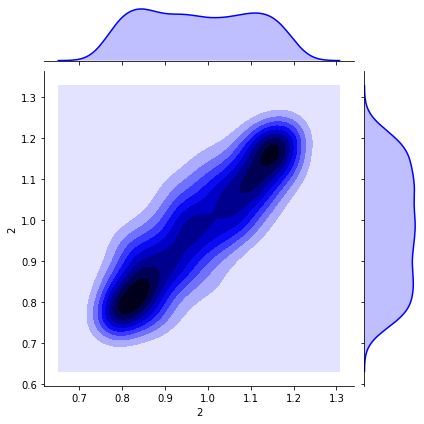

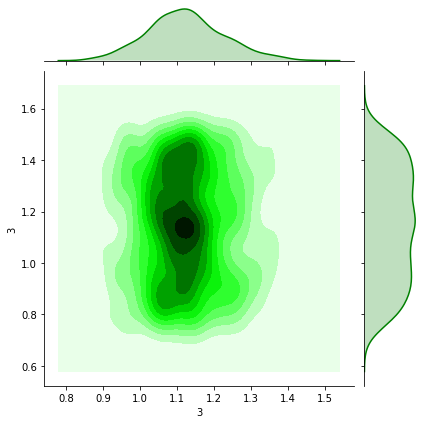

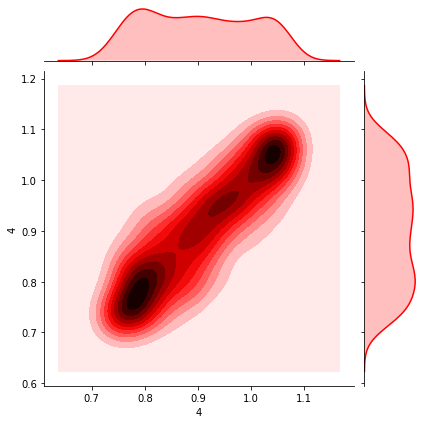

In [273]:
plot_corr(y_multirf,y_test)

AttributeError: 'MultiOutputRegressor' object has no attribute 'feature_importances_'

In [77]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_estimators":[i for i in range(50,2000,50)],
    "max_depth":[None,50,100,150,200,250,300],
    "min_samples_split":[2],
    "max_features":('auto','sqrt','log2'),
    "bootstrap":[True,False],
    "oob_score":[True,False]}

clf = GridSearchCV(reg_rf, parameters,n_jobs=-1 ,cv=5)
clf.fit(X_train,y_train)

/home/ajana/.local/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


KeyboardInterrupt: 

In [ ]:
sorted(clf.cv_results_.keys())

In [ ]:
grid = clf.predict(X_test)
print (np.mean((grid - y_test)**2/(grid**2), axis=0))

In [282]:
np.logspace(-1,1.3,30)

array([ 0.1       ,  0.12003568,  0.14408564,  0.17295417,  0.20760671,
        0.24920212,  0.29913145,  0.35906445,  0.43100545,  0.5173603 ,
        0.62101694,  0.74544189,  0.89479621,  1.07407469,  1.28927282,
        1.54758735,  1.85765695,  2.22985109,  2.67661685,  3.21289514,
        3.85662042,  4.62932042,  5.55683609,  6.67018579,  8.00660265,
        9.61077966, 11.5363644 , 13.84775306, 16.62224408, 19.95262315])